In [1]:


import pandas as pd

heart_data=pd.read_csv('heart-disease1.csv')

In [2]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# data dictionary
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female) (1-male,0-female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]

In [3]:
# All the modules used

# data analysis

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# to make sure the plots are in the notebook
%matplotlib inline 

#Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#model evaluvation
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import RocCurveDisplay


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

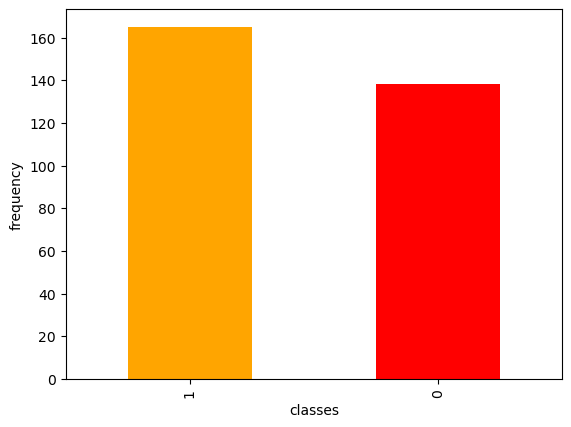

In [8]:
heart_data['target'].value_counts().plot.bar(color=['orange','red'])
plt.xlabel('classes')
plt.ylabel('frequency')

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heart_data['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

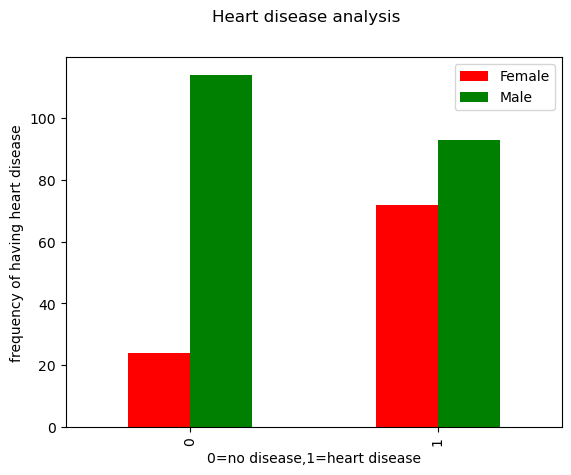

In [11]:
pd.crosstab(heart_data['target'],heart_data['sex']).plot.bar(color=['red','green'],label='sex')
plt.xlabel('0=no disease,1=heart disease')
plt.ylabel('frequency of having heart disease')
plt.legend(['Female','Male']);
plt.suptitle('Heart disease analysis');

In [12]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
heart_data.cp.value_counts()
heart_data.fbs.value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

# Age vs heart rate

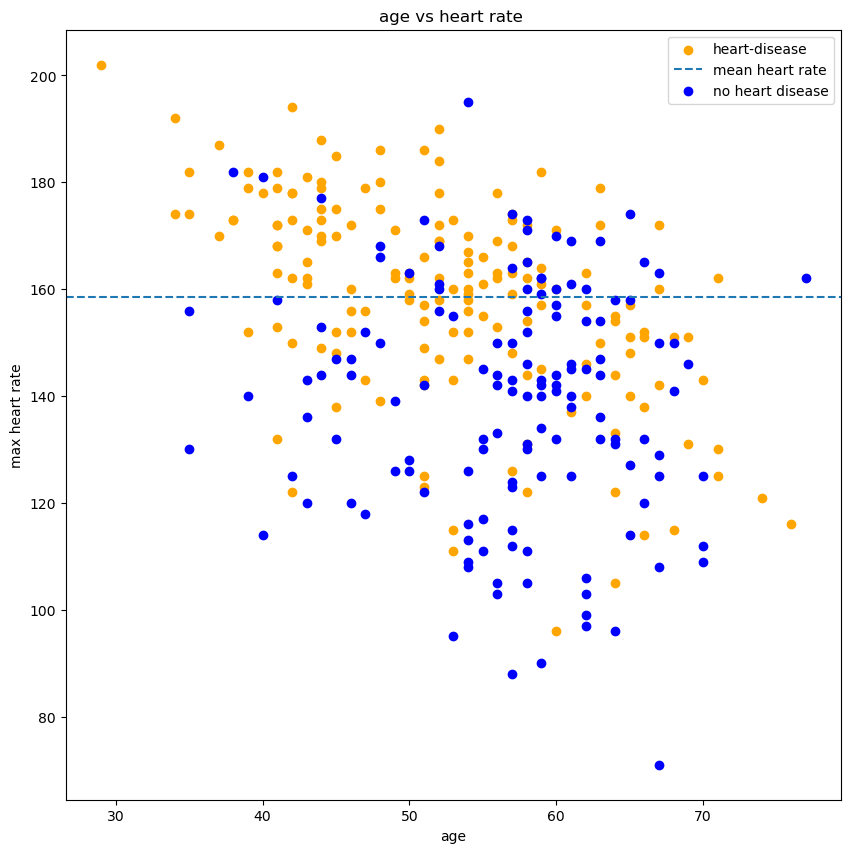

In [14]:

plt.figure(figsize=(10,10))
plt.scatter(heart_data['age'][heart_data['target']==1],heart_data['thalach'][heart_data['target']==1],label='heart-disease',c='orange')
plt.legend()
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.title('age vs heart rate ');
plt.axhline(heart_data['thalach'][heart_data['target']==1].mean(),linestyle='--',label='mean heart rate')
plt.scatter(heart_data['age'][heart_data['target']==0],heart_data['thalach'][heart_data['target']==0],label='no heart disease',c='blue')
plt.legend();

In [15]:
heart_data['age'][heart_data['target']==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

In [16]:
# heart disease vs chest pain

#plt.figure(figsize=(10,10))

pd.crosstab(heart_data['cp'],heart_data['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Figure size 1000x1000 with 0 Axes>

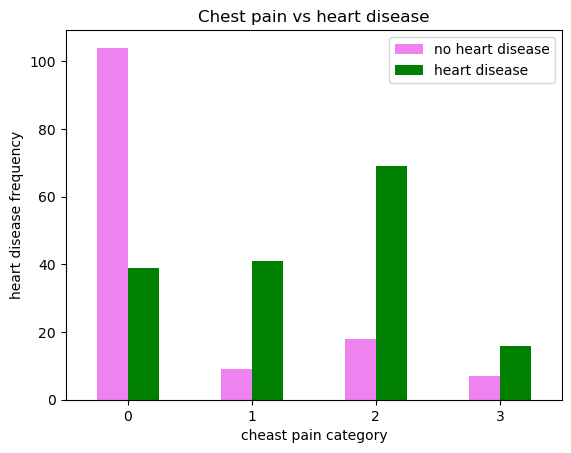

In [17]:

plt.figure(figsize=(10,10))
pd.crosstab(heart_data['cp'],heart_data['target']).plot.bar(color=['violet','green'])
plt.legend(['no heart disease','heart disease'])
plt.xlabel('cheast pain category')
plt.ylabel('heart disease frequency');
plt.title('Chest pain vs heart disease');
plt.xticks(rotation=0); # to rotate the x values in the x axis to make it straight

In [18]:
#making correlation

heart_data.corr()
heart_data1=pd.read_csv('heart-disease1.csv')

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# the correlation value 1.00

- the value one is given because we are comparing the same column to that column itself

<Axes: >

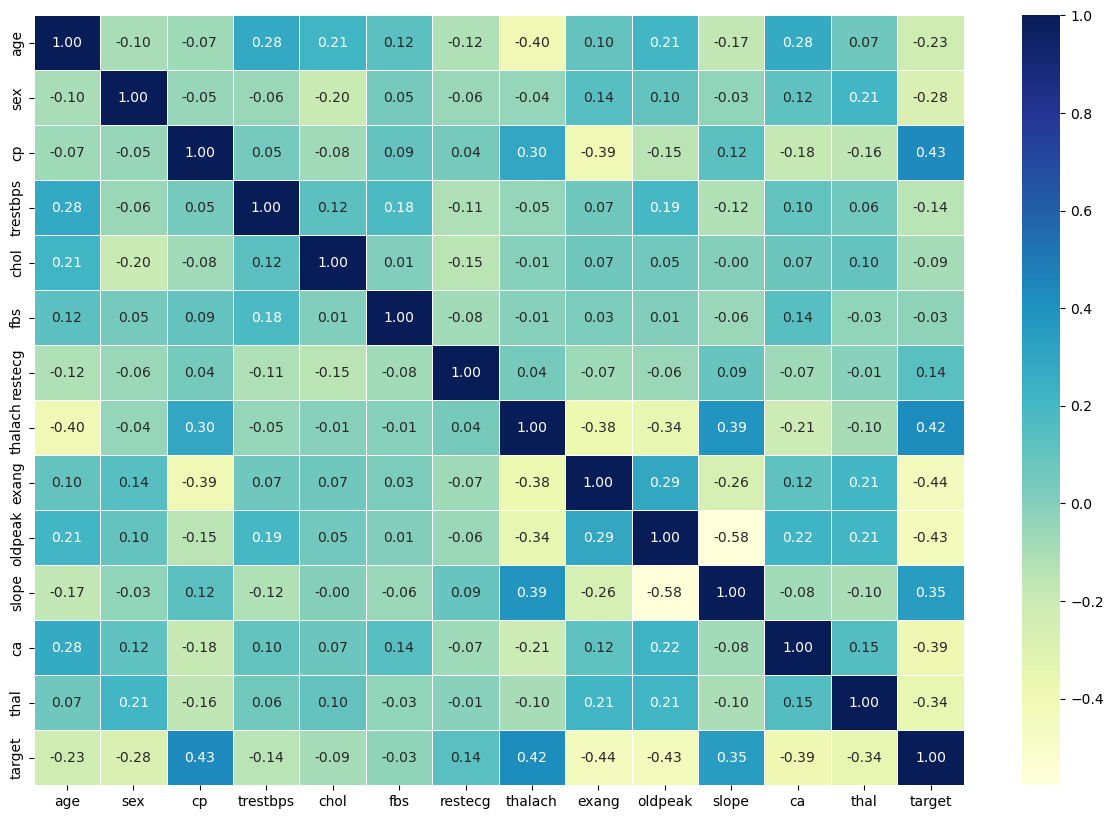

In [19]:
# visualise it
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,10))
corr_matrix=heart_data1.corr()
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')


# Modelling the data

In [20]:
#splitting data

x=heart_data.drop('target',axis=1)
y=heart_data['target']

In [21]:
# splitting to train and test


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Models used
1. LogisticRegression
2.KNeighborsClassifier
3.RandomForestClassifier

In [22]:
models_used={
    'LogisticRegression':LogisticRegression(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}
model_scores={}

def score(x_train,x_test,y_train,y_test):
    ''' 
    This function will take 4 parameters and then fit the model and return the score of each model'''
    for i in models_used.keys():
        print('The model used:',i)
        models_used[i].fit(x_train,y_train)
        model_scores[i]=models_used[i].score(x_test,y_test)
        print(f'The score of the model {i}:',models_used[i].score(x_test,y_test))
score(x_train,x_test,y_train,y_test)
model_scores

The model used: LogisticRegression
The score of the model LogisticRegression: 0.7540983606557377
The model used: KNeighborsClassifier
The score of the model KNeighborsClassifier: 0.639344262295082
The model used: RandomForestClassifier


d:\anaconda\project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The score of the model RandomForestClassifier: 0.7049180327868853


{'LogisticRegression': 0.7540983606557377,
 'KNeighborsClassifier': 0.639344262295082,
 'RandomForestClassifier': 0.7049180327868853}

          LogisticRegression  KNeighborsClassifier  RandomForestClassifier
accuracy            0.754098              0.639344                0.704918


<Axes: >

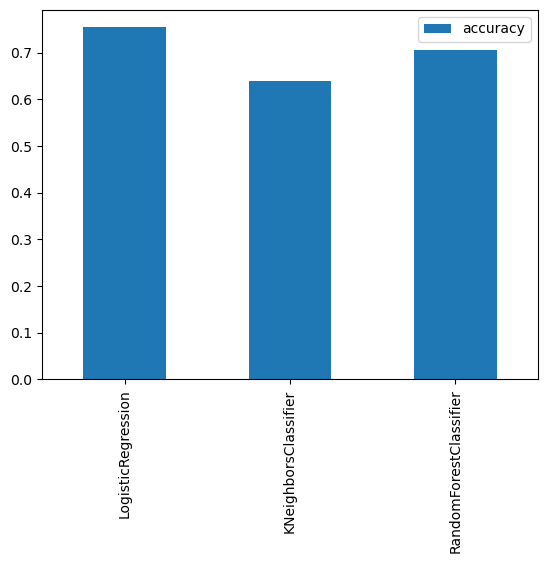

In [23]:
model_d=pd.DataFrame(model_scores,index=['accuracy'])

print(model_d)

#plotting it
# T- transpose the dataframe
model_d.T.plot.bar()

In [24]:
#fitting the model by tunning


train_score=[]
test_score=[]
for i in range(1,21):
    model1=KNeighborsClassifier().set_params(n_neighbors=i)
    model1.fit(x_train,y_train)
    train_score.append(model1.score(x_train,y_train))
    test_score.append(model1.score(x_test,y_test))


print(train_score)
print()
print(test_score)

print('The max model score of the k niegbours classifier:',round(max(test_score)*100,2))

[1.0, 0.8099173553719008, 0.8016528925619835, 0.7892561983471075, 0.78099173553719, 0.7603305785123967, 0.756198347107438, 0.731404958677686, 0.7148760330578512, 0.7148760330578512, 0.6983471074380165, 0.7148760330578512, 0.7148760330578512, 0.71900826446281, 0.7066115702479339, 0.7148760330578512, 0.7355371900826446, 0.7272727272727273, 0.7231404958677686, 0.7272727272727273]

[0.6065573770491803, 0.5737704918032787, 0.5737704918032787, 0.5573770491803278, 0.639344262295082, 0.5901639344262295, 0.5737704918032787, 0.5573770491803278, 0.5573770491803278, 0.5737704918032787, 0.6065573770491803, 0.6229508196721312, 0.6065573770491803, 0.639344262295082, 0.6229508196721312, 0.6065573770491803, 0.6229508196721312, 0.6065573770491803, 0.6065573770491803, 0.5901639344262295]
The max model score of the k niegbours classifier: 63.93


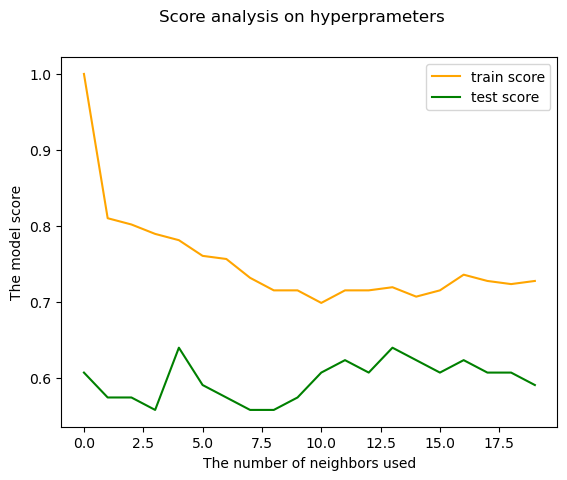

In [25]:
# visualise the scores

plt.plot(train_score,label='train score',color='orange')
plt.plot(test_score,label='test score',color='green')
plt.xlabel('The number of neighbors used')
plt.ylabel('The model score')
plt.suptitle('Score analysis on hyperprameters')
plt.legend()

In [26]:
LogisticRegression().get_params(
)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
# Creating RandomSearchCV hyper parameter for linear Regression and randomforest classification

log_reg_grid={
    'C':np.logspace(-4,4,10),
    'penalty':['l1','l2','elasticent'],
    'tol':[0.00001,0.001,0.01,1,10],
    'solver':['liblinear'],
}

rf_grid={
    'n_estimators':np.arange(10,1000,10),
    'max_depth':[None,3,5,10,100],
    'min_samples_split':np.arange(10,20,2),
    'min_samples_leaf':np.arange(1,10,2),

}

In [28]:
np.arange(10,100,10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# Tunning the models using the hyperparameters
- logistic regression
- randomforestclassifier

In [29]:

log_reg=LogisticRegression()
log_reg_rv=RandomizedSearchCV(log_reg,n_iter=10,verbose=2,param_distributions=log_reg_grid,cv=5)
log_reg_rv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=1291.5496650148827, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1291.5496650148827, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1291.5496650148827, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1291.5496650148827, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1291.5496650148827, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.005994842503189409, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.005994842503189409, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.005994842503189409, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.005994842503189409, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.005994842503189409, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1291.54966501

d:\anaconda\project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\anaconda\project\env\Lib\site-packages\sklearn

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticent'],
                                        'solver': ['liblinear'],
                                        'tol': [1e-05, 0.001, 0.01, 1, 10]},
                   verbose=2)

In [30]:
log_reg_rv.score(x_test,y_test)

0.7540983606557377

In [91]:
log_reg_rv.best_params_

{'tol': 0.001, 'solver': 'liblinear', 'penalty': 'l1', 'C': 1291.5496650148827}

In [31]:

np.random.seed(42)
rf=RandomForestClassifier()
rf_rc=RandomizedSearchCV(rf,verbose=2,cv=5,param_distributions=rf_grid,n_iter=40)
rf_rc.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=16, n_estimators=440; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=16, n_estimators=440; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=16, n_estimators=440; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=16, n_estimators=440; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=16, n_estimators=440; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=690; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=690; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=690; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=690; total time=   0.7s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'max_depth': [None, 3, 5, 10, 100],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=2)

In [32]:

print('The best parameters:',rf_rc.best_params_)
rf_rc.score(x_test,y_test)

The best parameters: {'n_estimators': 360, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 3}


0.7377049180327869

# using grid search cv for tunning the hyperparameters of the logistic regression and randomforestclassifier



In [73]:
# Creating gridSearchCV hyper parameter for linear Regression and randomforest classification

log_grid={
    'C':np.logspace(-4,4,10),
    'penalty':['l1','l2','elasticent'],
    'tol':[0.00001,0.001,0.01,1,10],
    'solver':['liblinear'],
}

rf_grid={
 'n_estimators':[100,500,1000],
    'max_depth':[10,20,30],
    'min_samples_split':[1,2],
    'min_samples_leaf':[3,4],
}

In [34]:

log_reg1=LogisticRegression()
log_reg_gd=GridSearchCV(log_reg1,cv=5,verbose=2,param_grid=log_grid)

log_reg_gd.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END ..C=0.0001, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END ...C=0.0001, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END ...C=0.0001, penalty=l1, solver=libli

d:\anaconda\project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\anaconda\project\env\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticent'],
                         'solver': ['liblinear'],
                         'tol': [1e-05, 0.001, 0.01, 1, 10]},
             verbose=2)

In [35]:
log_reg_gd.best_params_

{'C': 21.54434690031882, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.01}

In [36]:
log_reg_gd.score(x_test,y_test)

0.7540983606557377

In [74]:
# forest classifier model

clf=RandomForestClassifier()
clf_gd=GridSearchCV(clf,cv=5,verbose=2,param_grid=rf_grid)

clf_gd.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, min_sa

d:\anaconda\project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\anaconda\project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\anaconda\project\env\Lib\site-packages\skle

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [1, 2],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [75]:
clf_gd.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
clf_gd.score(x_test,y_test)

0.7049180327868853

# Evaluation of the models
- LogisticRegression
- RandomForestClassifier

In [88]:
y_preds=log_reg_gd.predict(x_test)
y_preds

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

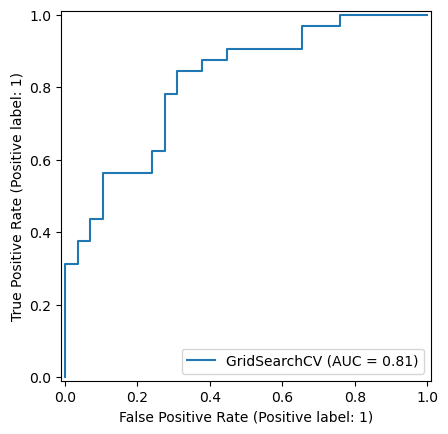

In [77]:
#plotting roc curve

RocCurveDisplay.from_estimator(log_reg_gd,x_test,y_test)

The confusion matrix: [[20  9]
 [ 6 26]]


Text(95.72222222222221, 0.5, 'Actual data')

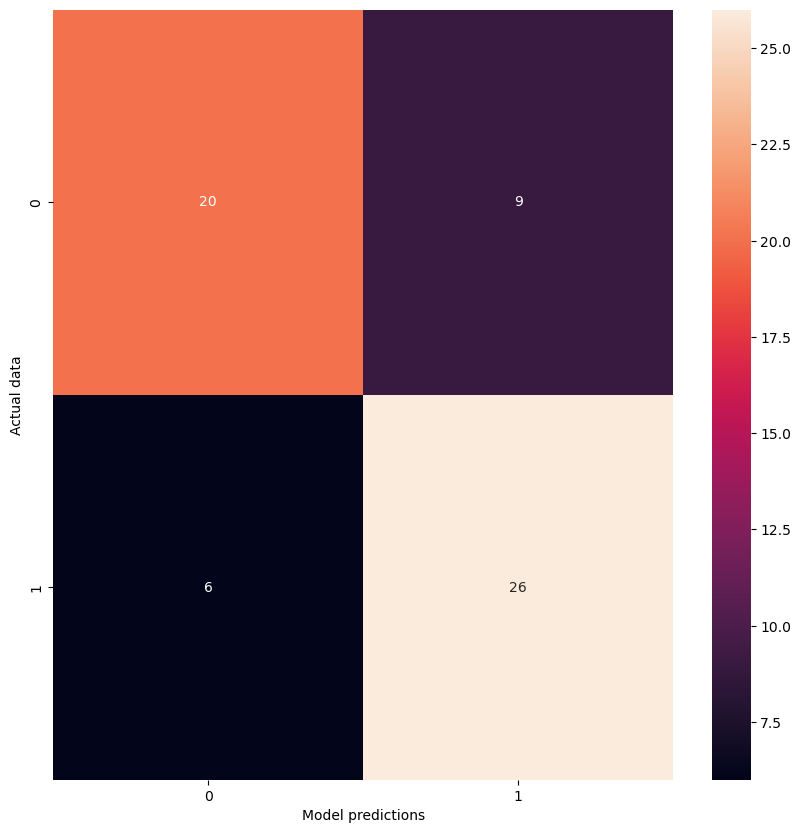

In [78]:
#confusion matrix

fig,ax=plt.subplots(figsize=(10,10))
print('The confusion matrix:',confusion_matrix(y_test,y_preds))


#heat map of the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,ax=ax)
ax.set_xlabel('Model predictions')
ax.set_ylabel('Actual data')

In [89]:
y_preds

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [90]:
#classification report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [95]:
log_clf=LogisticRegression(tol= 0.001, solver= 'liblinear', penalty= 'l1', C= 1291.5496650148827)
log_clf.fit(x_train, y_train)

LogisticRegression(C=1291.5496650148827, penalty='l1', solver='liblinear',
                   tol=0.001)

In [166]:
# classification of the model using Logistic Regression and cross validation


def evaluvation(clf,x,y):
    print(f'The model used {clf}')
    print('The accuracy of the model with cross validation:',np.mean(cross_val_score(clf,x,y,scoring='accuracy')))
    print('The precision of the model with cross validation:',np.mean(cross_val_score(clf,x,y,scoring='precision')))
    print('The f1 score  of the model with cross validation:',np.mean(cross_val_score(clf,x,y,scoring='f1')))
    print('The recall of the model with cross validation:',np.mean(cross_val_score(clf,x,y,scoring='recall')))


evaluvation(log_clf,x,y)

The model used LogisticRegression(C=1291.5496650148827, penalty='l1', solver='liblinear',
                   tol=0.001)
The accuracy of the model with cross validation: 0.8283060109289618
The precision of the model with cross validation: 0.8230422730422731
The f1 score  of the model with cross validation: 0.8521267621267622
The recall of the model with cross validation: 0.8787878787878787


In [110]:
cross_validation_metrics=pd.DataFrame({'accuracy':np.mean(cross_val_score(clf,x,y,scoring='accuracy')),
                                       'precision':np.mean(cross_val_score(clf,x,y,scoring='precision')),
                                       'f1 score':np.mean(cross_val_score(clf,x,y,scoring='f1')),
                                       'recall':np.mean(cross_val_score(clf,x,y,scoring='recall'))

},index=[0])

cross_validation_metrics.T

,0
accuracy,0.818142
precision,0.821657
f1 score,0.820838
recall,0.854545


<Axes: title={'center': 'Model prediction'}>

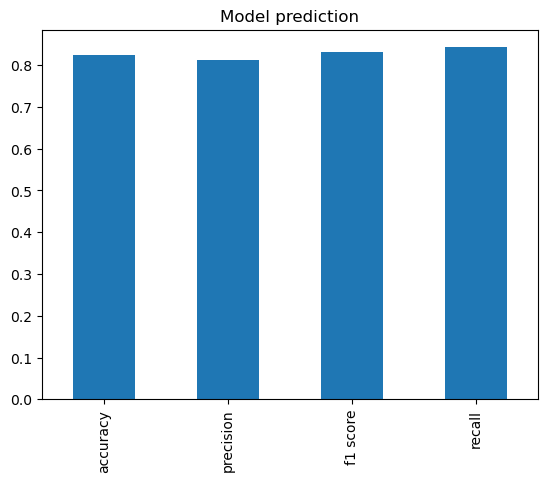

In [109]:
cross_validation_metrics.T.plot.bar(title='Model prediction',legend=False)


# Feature importance
- it means how much the each columns or data is contributing to the predictions


In [114]:
log_clf.coef_

array([[-0.01728421, -1.82298762,  0.80385649, -0.00223351, -0.00500409,
        -0.41396074,  0.64969062,  0.01859146, -1.48818868, -0.62230436,
         0.78942938, -0.981667  , -0.79737077]])

In [119]:
d1=dict(zip(heart_data.columns,log_clf.coef_[0]))
d1

{'age': -0.017284214891536507,
 'sex': -1.822987623660904,
 'cp': 0.8038564861238588,
 'trestbps': -0.002233506252167328,
 'chol': -0.005004087765291697,
 'fbs': -0.41396074471002653,
 'restecg': 0.6496906176780927,
 'thalach': 0.018591463751902466,
 'exang': -1.4881886809472655,
 'oldpeak': -0.62230436358651,
 'slope': 0.7894293793395458,
 'ca': -0.9816670025741185,
 'thal': -0.7973707721949347}

In [127]:
#visualization of feature importance

feature=pd.DataFrame(d1,index=['contributions'])
feature.T

,contributions
age,-0.017284
sex,-1.822988
cp,0.803856
trestbps,-0.002234
chol,-0.005004
fbs,-0.413961
restecg,0.649691
thalach,0.018591
exang,-1.488189
oldpeak,-0.622304


In [141]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [147]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


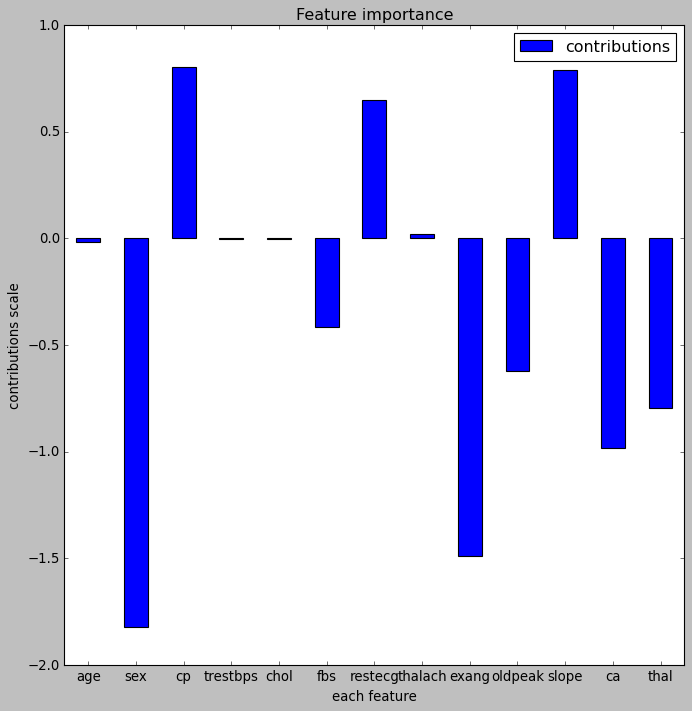

In [146]:

fig,ax=plt.subplots(figsize=(10,10))
feature.T.plot(kind='bar',title='Feature importance',xlabel='each feature',ax=ax)
plt.ylabel('contributions scale')
plt.xticks(rotation=0);


# Remaking the dataframe from feature importance

In [151]:
heart_data_remake=pd.DataFrame()
columns_list=['sex','cp','restecg','exang','slope','ca','thal','target']
for i in columns_list:
    heart_data_remake[i]=heart_data[i]

heart_data_remake

,sex,cp,restecg,exang,slope,ca,thal,target
0,1,3,0,0,0,0,1,1
1,1,2,1,0,0,0,2,1
2,0,1,0,0,2,0,2,1
3,1,1,1,0,2,0,2,1
4,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...
298,0,0,1,1,1,0,3,0
299,1,3,1,0,1,0,3,0
300,1,0,1,0,1,2,3,0
301,1,0,1,1,1,1,3,0


In [152]:
x_remake=heart_data_remake.drop('target',axis=1)
y_remake=heart_data_remake['target']

In [153]:
x_remake_train,x_remake_test,y_remake_train,y_remake_test=train_test_split(x_remake,y_remake,test_size=0.2)

In [162]:
np.random.seed(89)
clf_remake=RandomForestClassifier(n_estimators=100)

clf_remake.fit(x_remake_train,y_remake_train)
clf_remake.score(x_remake_test,y_remake_test)

0.819672131147541

In [160]:
# grid search cv for feature importance remake dataframe

grid={
    'n_estimators':[100,200,500,1000],
    'max_depth':[None,10,20,30],
    'max_features':[None],
    'min_samples_split':[2,4],
    'min_samples_leaf':[2,4]
}

In [161]:
clf_remake_gd=GridSearchCV(RandomForestClassifier(),verbose=2,param_grid=grid,cv=5)
clf_remake_gd.fit(x_remake_train, y_remake_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [163]:
clf_remake_gd.score(x_remake_test, y_remake_test)

0.7868852459016393

In [165]:
print(clf_remake)

RandomForestClassifier()


In [167]:
evaluvation(clf_remake,x_remake,y_remake)

The model used RandomForestClassifier()
The accuracy of the model with cross validation: 0.8415300546448089
The precision of the model with cross validation: 0.8651812848920747
The f1 score  of the model with cross validation: 0.8533551391013512
The recall of the model with cross validation: 0.8242424242424244


# experimentation 
- collect data more 
- tune the model to improve
- try other models like xgboost or catboost
- try to figure out the feature importance and remaking the data 


In [169]:
# exporting the data 


import joblib

joblib.dump(clf_remake,open('classifier.joblib','wb'))
